In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import smote_variants as sv
import imbalanced_databases as imbd
import matplotlib.pyplot as plt
from collections import Counter
import tensorflow as tf
from sklearn.metrics import confusion_matrix,accuracy_score,r2_score,roc_auc_score,precision_score,recall_score,f1_score

In [4]:
columns=["Volume", "MaximumRainfallIntensity", "Runoff", "RunoffVolume", "RunoffMaximumIntensity", "HR1", "HR2", 
         "HR3", "HR4", "HR5", "T1", "T2", "T3", "T4", "T5", "PB1", "PB2", "PB3", "PB4", "PB5", "VV1", "VV2", "VV3", "VV4",
         "VV5"]
data=pd.read_csv("./Storms_20221115.csv",sep=";", header=0, names=columns)
data.head()

,Volume,MaximumRainfallIntensity,Runoff,RunoffVolume,RunoffMaximumIntensity,HR1,HR2,HR3,HR4,HR5,...,PB1,PB2,PB3,PB4,PB5,VV1,VV2,VV3,VV4,VV5
0,4.1,1.4,0,0.0,0.0,79,75.0,81.0,90.0,89,...,944,945.0,946.0,947.0,947,1.62,0.77,0.80,0.89,0.88
1,1.6,0.7,0,0.0,0.0,96,96.0,95.0,96.0,95,...,939,940.0,941.0,941.0,941,0.72,0.77,0.67,0.73,1.04
2,0.1,0.1,0,0.0,0.0,75,68.0,63.0,54.0,53,...,943,943.0,943.0,944.0,945,2.05,1.91,2.14,2.15,2.01
3,3.6,1.2,0,0.0,0.0,81,62.0,46.0,40.0,40,...,939,939.0,939.0,939.0,940,1.94,1.90,2.17,2.19,2.20
4,0.1,0.1,0,0.0,0.0,99,99.0,99.0,98.0,97,...,935,935.0,936.0,936.0,937,2.24,2.03,1.94,1.82,1.97


In [79]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#np.load('y_2_train.npy', y_2_train)
#np.load('y_2_test.npy', y_2_test)
#np.load('y_3_train.npy', y_3_train)
#np.load('y_3_test.npy', y_3_test)
#np.load('y_4_train.npy', y_4_train)
#np.load('y_4_test.npy', y_4_test)
#np.load('y_5_train.npy', y_5_train)
#np.load('y_5_test.npy', y_5_test)

In [80]:
print(X_train.shape)

(2552, 20)


In [81]:
oversampler= sv.distance_SMOTE()

# X_samp and y_samp contain the oversampled dataset
X_samp, y_samp = oversampler.sample(X_train, y_train)

2022-11-25 10:29:15,149:INFO:distance_SMOTE: Running sampling via ('distance_SMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'distance_SMOTE'}")
2022-11-25 10:29:15,156:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-25 10:29:15,158:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-25 10:29:15,212:INFO:distance_SMOTE: simplex sampling with n_dim 2


In [82]:
print(Counter(y_train), Counter(y_samp))

Counter({0: 2310, 1: 242}) Counter({0: 2310, 1: 2310})


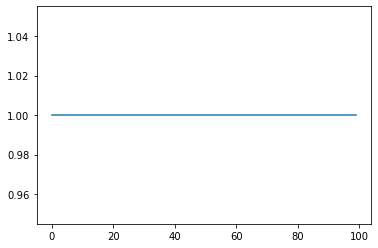

In [83]:
plt.plot(y_samp[-100:])

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import smote_variants as sv
import sklearn.datasets as datasets




classifiers = [('sklearn.neighbors', 'KNeighborsClassifier', {}),
              ('sklearn.tree', 'DecisionTreeClassifier', {})]

dataaset = {'data':X_train, 'target':y_train, 'name': 'andromeda'}

oversamplers = sv.queries.get_all_oversamplers(n_quickest=15)

os_params = sv.queries.generate_parameter_combinations(oversamplers,
                                                      n_max_comb=5)

# samp_obj and cl_obj contain the oversampling and classifier objects which give the
# best performance together
samp_obj, cl_obj= sv.evaluation.model_selection(dataset=dataaset,
                                                oversamplers=os_params,
                                                classifiers=classifiers,
                                                validator_params={'n_splits': 2,
                                                                  'n_repeats': 1},
                                                n_jobs= 5)

# training the best techniques using the entire dataset
#X_samp, y_samp = oversampler.sample(X_train, y_train)
X_samp, y_samp = samp_obj.sample(dataaset['data'], dataaset['target'])
print(Counter(y_train), Counter(y_samp))
cl_obj.fit(X_samp, y_samp)

preds2 = cl_obj.predict(X_test)

print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

2022-11-25 10:30:36.136517: processing dataset: andromeda


2022-11-25 10:30:45,163:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-25 10:30:45,164:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


Counter({0: 2310, 1: 242}) Counter({1: 2411, 0: 2310})
Acc Score:  0.5633802816901409
Roc Auc Score:  0.5240370979635827
Precision Score:  0.10507246376811594
Recall Score:  0.47540983606557374
f1 score:  0.172106824925816


In [87]:
preds2

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [41]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

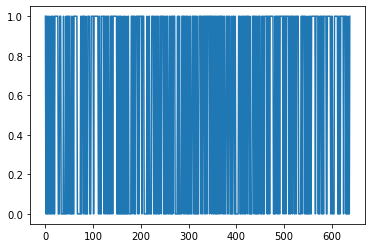

In [88]:
plt.plot(np.round(y_test == preds2))

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import sklearn.datasets as datasets


clss = XGBClassifier()
clss.fit(X_train, y_train)
clss.score(X_test, y_test)
preds2 = clss.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

Acc Score:  0.9014084507042254
Roc Auc Score:  0.5056015656021329
Precision Score:  0.25
Recall Score:  0.01639344262295082
f1 score:  0.030769230769230767


In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier
dataset= datasets.load_breast_cancer()

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifiers = [('lightgbm', 'LGBMClassifier', {"boosting_type":"gbdt","is_unbalance":True, "random_state":10, 
                                                 "n_estimators":200,"num_leaves":40, "max_depth":8,"feature_fraction":0.5,  
                                                 "bagging_fraction":0.8, "bagging_freq":15, "learning_rate":0.01,
                                                 "n_estimators":200, 
                                                 "num_leaves":30}),]
              #('xgboost', 'XGBClassifier', {}),]
              #('sklearn.neighbors', 'KNeighborsClassifier', {}),
              #('sklearn.tree', 'DecisionTreeClassifier', {}),]
              #('sklearn.svm', 'SVC', {}), ]
    #('sklearn.neural_network', 'MLPClassifier', {})]

oversamplers = sv.queries.get_all_oversamplers(n_quickest=10)


os_params = sv.queries.generate_parameter_combinations(oversamplers, n_max_comb=2)

# samp_obj and cl_obj contain the oversampling and classifier objects which give the
# best performance together
samp_obj, cl_obj= sv.evaluation.model_selection(dataset=dataset,
                                                oversamplers=os_params,
                                                classifiers=classifiers,
                                                validator_params={'n_splits': 2,
                                                                  'n_repeats': 1},
                                                n_jobs= 5)

# training the best techniques using the entire dataset
X_samp, y_samp= samp_obj.sample(dataset['data'],
                                dataset['target'])
cl_obj.fit(X_samp, y_samp)

2022-11-25 10:41:55.673914: processing dataset: Andromeda


2022-11-25 10:42:04,636:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 2.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-25 10:42:04,637:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 2.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


LGBMClassifier(bagging_fraction=0.8, bagging_freq=15, feature_fraction=0.5,
               is_unbalance=True, learning_rate=0.01, max_depth=8,
               n_estimators=200, num_leaves=30, random_state=10)

In [111]:
oversamplers = sv.queries.get_all_oversamplers(n_quickest=10)


os_params = sv.queries.generate_parameter_combinations(oversamplers, n_max_comb=1)
print(os_params)

[('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 2.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}), ('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}), ('smote_variants', 'ROSE', {'proportion': 0.5, 'random_state': None, 'class_name': 'ROSE'}), ('smote_variants', 'Gazzah', {'proportion': 2.0, 'n_components': 3, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}), ('smote_variants', 'SPY', {'n_neighbors': 7, 'nn_params': {}, 'threshold': 0.3, 'random_state': None, 'class_name': 'SPY'}), ('smote_variants', 'MSMOTE', {'proportion': 0.5, 'n_neighbors': 7, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}), ('smote_variants', 'AHC', {'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}), ('smote_variants', 'RWO_sampling', {'proportion': 0.25, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim':

In [112]:
preds2 = cl_obj.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

Acc Score:  0.6572769953051644
Roc Auc Score:  0.5172868568835441
Precision Score:  0.105
Recall Score:  0.3442622950819672
f1 score:  0.16091954022988506


In [104]:
#Basic Grid Search for model paramaters
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV

model = LGBMClassifier( 
    boosting_type="gbdt",
    is_unbalance=True, 
    random_state=10, 
    n_estimators=50,
    num_leaves=30, 
    max_depth=8,
    feature_fraction=0.5,  
    bagging_fraction=0.8, 
    bagging_freq=15, 
    learning_rate=0.01,    
)

params_opt = {'n_estimators':range(200, 600, 80), 'num_leaves':range(20,60,10), 'max_depth':range(1, 9)}
gridSearchCV = GridSearchCV(estimator = model, 
    param_grid = params_opt, 
    scoring=['f1_micro', 'roc_auc_ovo'],
                           refit='f1_micro')
gridSearchCV.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_fr

GridSearchCV(estimator=LGBMClassifier(bagging_fraction=0.8, bagging_freq=15,
                                      feature_fraction=0.5, is_unbalance=True,
                                      learning_rate=0.01, max_depth=8,
                                      n_estimators=50, num_leaves=30,
                                      random_state=10),
             param_grid={'max_depth': range(1, 9),
                         'n_estimators': range(200, 600, 80),
                         'num_leaves': range(20, 60, 10)},
             refit='f1_micro', scoring=['f1_micro', 'roc_auc_ovo'])

In [106]:
df = pd.DataFrame(gridSearchCV.cv_results_)
df = df.sort_values("rank_test_f1_micro")
df.head()
df.to_csv("cv_results.csv", index = False)

In [54]:
over_samplers = [('smote_variants', 'polynom_fit_SMOTE_bus', {}),
              ('smote_variants', 'polynom_fit_SMOTE_star', {}),
              ('smote_variants', 'ROSE', {}),
              ('smote_variants', 'Gazzah', {}),
              ('smote_variants', 'MSMOTE', {}),
              ('smote_variants', 'RWO_sampling', {}),
              ('smote_variants', 'AHC', {}),
              ('smote_variants', 'polynom_fit_SMOTE_mesh', {}),
              ('smote_variants', 'polynom_fit_SMOTE_poly', {}),
              ('smote_variants', 'polynom_fit_SMOTE_bus', {})]

proprtions = [0.1 * i for i in range(0, 20, 5)]
print(proprtions)

[0.0, 0.5, 1.0, 1.5]


In [55]:
import smote_variants as sv
import imblearn.datasets as imb_datasets

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

results = pd.DataFrame(columns=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_clf__oversampler', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'])

for over_s in over_samplers: 
    oversampler = over_s

    classifier = ('lightgbm', 'LGBMClassifier', {"boosting_type":"gbdt","is_unbalance":True, "random_state":10, 
                                                 "n_estimators":50,"num_leaves":30, "max_depth":8,"feature_fraction":0.5,  
                                                 "bagging_fraction":0.8, "bagging_freq":15, "learning_rate":0.01,
                                                 "n_estimators":200, 
                                                 "num_leaves":30})

    # Constructing a pipeline with oversampling and classification as the last step
    model= Pipeline([('clf', sv.classifiers.OversamplingClassifier(oversampler, classifier)),
                     #('scale', StandardScaler()),
                    ])
    options=[]
    for prop in proprtions:
        options.append((over_s[0], over_s[1], {'proportion': prop}))

    param_grid= {'clf__oversampler':options}
                  #('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': range(0,40, 5) * 0.1}),
                  #('smote_variants', 'ROSE', {'proportion': range(0,40, 5) * 0.1}),
                  #('smote_variants', 'Gazzah', {'proportion': range(0,40, 5) * 0.1}),
                  #('smote_variants', 'MSMOTE', {'proportion': range(0,40, 5) * 0.1}),
                  #('smote_variants', 'RWO_sampling', {'proportion': range(0,40, 5) * 0.1}),
                  #('smote_variants', 'AHC', {}),
                  #('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': range(0,40, 5) * 0.1}),
                  #('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': range(0,40, 5) * 0.1}),
                  #('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': range(0,40, 5) * 0.1}),]}

    # Specifying the gridsearch for model selection
    grid= GridSearchCV(model,
                      param_grid=param_grid,
                      cv=3,
                      n_jobs=1,
                      verbose=2,
                      scoring='f1_micro')

    # Fitting the pipeline
    grid.fit(X_train, y_train)
    df = pd.DataFrame(grid.cv_results_)
    results = pd.concat([results, df], ignore_index=True)

2022-11-24 13:52:55,863:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:55,864:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:55,866:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:52:55,992:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:55,993:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:55,994:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:56,125:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:56,125:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:56,126:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:52:56,269:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:56,270:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:56,441:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:56,442:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:56,590:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:56,591:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:56,724:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:56,725:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:56,863:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:56,863:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:57,038:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:57,038:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:57,184:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:57,185:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:57,339:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:57,340:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:57,495:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:57,496:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:57,676:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:52:57,677:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:57,677:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:52:57,806:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:57,807:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:57,808:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
Fitting 3 folds for each of 4 candidates, totalling 12 fits


2022-11-24 13:52:57,913:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:57,914:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:57,914:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:52:58,017:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:58,018:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:58,018:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:58,164:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:58,164:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:58,292:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:58,293:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 0.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:58,429:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:58,430:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:58,563:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:58,564:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 0.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 0.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:58,723:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:58,724:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 1.0}); total time=   0.1s


2022-11-24 13:52:58,929:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:58,930:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:59,075:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:59,076:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 1.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:59,274:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:59,276:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 1.5}); total time=   0.1s


2022-11-24 13:52:59,467:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:59,468:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:59,638:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:52:59,640:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:52:59,640:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:59,762:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.0, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:52:59,763:INFO:ROSE: returning copies for Sampling is not needed
2022-11-24 13:52:59,867:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.0, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:52:59,868:INFO:ROSE: returning copies for Sampling is not needed


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:52:59,985:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.0, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:52:59,986:INFO:ROSE: returning copies for Sampling is not needed
2022-11-24 13:53:00,134:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.5, 'random_state': None, 'class_name': 'ROSE'}")


[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:00,274:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.5, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:53:00,372:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 0.5, 'random_state': None, 'class_name': 'ROSE'}")


[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 0.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 0.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 0.5}); total time=   0.0s


2022-11-24 13:53:00,467:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.0, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:53:00,589:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.0, 'random_state': None, 'class_name': 'ROSE'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 1.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:00,701:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.0, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:53:00,814:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.5, 'random_state': None, 'class_name': 'ROSE'}")


[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 1.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 1.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:00,970:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.5, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:53:01,101:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.5, 'random_state': None, 'class_name': 'ROSE'}")


[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 1.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:01,246:INFO:ROSE: Running sampling via ('ROSE', "{'proportion': 1.0, 'random_state': None, 'class_name': 'ROSE'}")
2022-11-24 13:53:01,383:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 0.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:01,384:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:01,385:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:01,386:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:53:01,386:INFO:Gazzah: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'ROSE', {'proportion': 1.5}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
Fitting 3 folds for each of 4 candidates, totalling 12 fits


2022-11-24 13:53:01,499:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 0.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:01,500:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:01,501:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:01,502:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:53:01,502:INFO:Gazzah: returning copies for Sampling is not needed
2022-11-24 13:53:01,643:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 0.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:01,645:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SM

[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:01,782:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 0.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:01,783:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:01,784:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:01,791:INFO:Gazzah: Removing 485 majority samples


[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 0.5}); total time=   0.1s


2022-11-24 13:53:01,971:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 0.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:01,972:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:01,973:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:01,979:INFO:Gazzah: Removing 412 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:02,220:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 0.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:02,220:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:02,221:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:02,227:INFO:Gazzah: Removing 428 majority samples


[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 0.5}); total time=   0.1s


2022-11-24 13:53:02,398:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:02,399:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:02,400:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:02,409:INFO:Gazzah: Removing 485 majority samples
2022-11-24 13:53:02,589:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:02,590:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 1.0}); total time=   0.1s


2022-11-24 13:53:02,780:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:02,781:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:02,782:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:02,790:INFO:Gazzah: Removing 428 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 1.0}); total time=   0.1s


2022-11-24 13:53:02,977:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:02,978:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:02,979:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:02,989:INFO:Gazzah: Removing 485 majority samples


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:03,187:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:03,187:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:03,188:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:03,199:INFO:Gazzah: Removing 412 majority samples


[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:03,452:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 1.5, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:03,453:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:03,454:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:03,464:INFO:Gazzah: Removing 428 majority samples


[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:03,663:INFO:Gazzah: Running sampling via ('Gazzah', "{'proportion': 0.0, 'n_components': 2, 'n_jobs': 1, 'random_state': None, 'class_name': 'Gazzah'}")
2022-11-24 13:53:03,664:INFO:polynom_fit_SMOTE_star: Running sampling via ('polynom_fit_SMOTE_star', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_star'}")
2022-11-24 13:53:03,665:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'star', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:03,666:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:53:03,667:INFO:Gazzah: returning copies for Sampling is not needed
2022-11-24 13:53:03,793:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:03,794:INFO:MSMOTE: returning copies for Sampling is not 

[CV] END clf__oversampler=('smote_variants', 'Gazzah', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
Fitting 3 folds for each of 4 candidates, totalling 12 fits


2022-11-24 13:53:03,920:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:03,921:INFO:MSMOTE: returning copies for Sampling is not needed
2022-11-24 13:53:04,044:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:04,046:INFO:MSMOTE: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:04,189:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:04,190:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:04,191:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:04,388:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:04,390:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:04,390:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:04,577:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.5, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:04,578:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:04,578:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


2022-11-24 13:53:04,763:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:04,764:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:04,764:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


2022-11-24 13:53:04,942:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:04,943:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:04,944:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:05,142:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:05,143:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:05,143:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:05,387:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.5, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:05,389:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:05,391:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:05,616:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.5, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:05,617:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:05,617:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:05,847:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 1.5, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:05,848:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:05,848:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski


[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'MSMOTE', {'proportion': 1.5}); total time=   0.1s


2022-11-24 13:53:06,035:INFO:MSMOTE: Running sampling via ('MSMOTE', "{'proportion': 0.0, 'n_neighbors': 5, 'nn_params': {}, 'n_jobs': 1, 'random_state': None, 'class_name': 'MSMOTE'}")
2022-11-24 13:53:06,036:INFO:MSMOTE: returning copies for Sampling is not needed
2022-11-24 13:53:06,174:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.0, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:06,175:INFO:RWO_sampling: returning copies for Sampling is not needed


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
Fitting 3 folds for each of 4 candidates, totalling 12 fits


2022-11-24 13:53:06,317:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.0, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:06,318:INFO:RWO_sampling: returning copies for Sampling is not needed
2022-11-24 13:53:06,433:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.0, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:06,433:INFO:RWO_sampling: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:06,555:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:06,557:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:06,558:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:06,590:INFO:RWO_sampling: simplex sampling with n_dim 1
2022-11-24 13:53:06,727:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:06,728:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:06,729:INFO:Near

[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 0.0}); total time=   0.0s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 0.5}); total time=   0.1s


2022-11-24 13:53:06,763:INFO:RWO_sampling: simplex sampling with n_dim 1


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 0.5}); total time=   0.1s


2022-11-24 13:53:06,962:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:06,963:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:06,964:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:06,998:INFO:RWO_sampling: simplex sampling with n_dim 1
2022-11-24 13:53:07,151:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.0, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:07,152:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:07,153:INFO:Near

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 1.0}); total time=   0.1s


2022-11-24 13:53:07,384:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.0, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:07,386:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:07,386:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:07,420:INFO:RWO_sampling: simplex sampling with n_dim 1


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:07,627:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.0, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:07,628:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:07,629:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:07,664:INFO:RWO_sampling: simplex sampling with n_dim 1


[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:07,859:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:07,860:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:07,861:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:07,896:INFO:RWO_sampling: simplex sampling with n_dim 1


[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:08,130:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:08,131:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:08,132:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:08,172:INFO:RWO_sampling: simplex sampling with n_dim 1


[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:08,461:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 1.5, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:08,462:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2022-11-24 13:53:08,463:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2022-11-24 13:53:08,514:INFO:RWO_sampling: simplex sampling with n_dim 1


[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:08,800:INFO:RWO_sampling: Running sampling via ('RWO_sampling', "{'proportion': 0.0, 'nn_params': {}, 'n_jobs': 1, 'ss_params': {'n_dim': 1, 'simplex_sampling': 'random', 'within_simplex_sampling': 'random', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'RWO_sampling'}")
2022-11-24 13:53:08,802:INFO:RWO_sampling: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'RWO_sampling', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:09,024:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits


2022-11-24 13:53:09,276:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 0.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:09,625:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 0.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:09,886:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 0.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 0.5}); total time=   0.1s


2022-11-24 13:53:10,074:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:10,281:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:10,502:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 1.0}); total time=   0.1s


2022-11-24 13:53:10,693:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")
2022-11-24 13:53:10,877:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 1.0}); total time=   0.1s


2022-11-24 13:53:11,056:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:11,219:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 1.5}); total time=   0.1s


2022-11-24 13:53:11,397:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'AHC', {'proportion': 1.5}); total time=   0.1s


2022-11-24 13:53:11,626:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:11,913:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 0.0, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:11,914:INFO:polynom_fit_SMOTE_mesh: returning copies for Sampling is not needed
2022-11-24 13:53:12,098:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 0.0, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 0.0}); total time=   0.1s


2022-11-24 13:53:12,098:INFO:polynom_fit_SMOTE_mesh: returning copies for Sampling is not needed


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 0.0}); total time=   0.1s


2022-11-24 13:53:12,305:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 0.0, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:12,307:INFO:polynom_fit_SMOTE_mesh: returning copies for Sampling is not needed
2022-11-24 13:53:12,484:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 0.5, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:12,486:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 0.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:12,695:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 0.5, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:12,697:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:12,947:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 0.5, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:12,949:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 0.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:13,177:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 1.0, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:13,180:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:13,479:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 1.0, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:13,481:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 1.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:13,740:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 1.0, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:13,743:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 1.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:13,985:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 1.5, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:13,988:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:14,225:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 1.5, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:14,228:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:14,466:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 1.5, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:14,470:INFO:polynom_fit_SMOTE_mesh: simplex sampling with n_dim 2


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:14,749:INFO:polynom_fit_SMOTE_mesh: Running sampling via ('polynom_fit_SMOTE_mesh', "{'proportion': 0.0, 'ss_params': {'n_dim': 2, 'simplex_sampling': 'random', 'within_simplex_sampling': 'deterministic', 'gaussian_component': {}}, 'random_state': None, 'class_name': 'polynom_fit_SMOTE_mesh'}")
2022-11-24 13:53:14,750:INFO:polynom_fit_SMOTE_mesh: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
Fitting 3 folds for each of 4 candidates, totalling 12 fits


2022-11-24 13:53:14,934:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 0.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:14,935:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:14,936:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:53:15,102:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 0.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:15,103:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:15,104:INFO:polynom_fit_SMOTE: returning copies for Sampling is n

[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:15,473:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 0.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:15,474:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:15,811:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 0.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:15,812:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:16,086:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 0.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:16,087:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:16,383:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 1.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:16,385:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:16,676:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 1.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:16,678:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:16,994:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 1.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:16,995:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:17,307:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:17,308:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:17,652:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:17,653:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:17,993:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:17,994:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:18,340:INFO:polynom_fit_SMOTE_poly: Running sampling via ('polynom_fit_SMOTE_poly', "{'order': 2, 'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_poly'}")
2022-11-24 13:53:18,341:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'poly_2', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:18,719:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:18,721:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:18,723:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed
2022-11-24 13:53:18,890:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:18,891:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:18,892:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}); total time=   0.1s


2022-11-24 13:53:19,075:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:19,076:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:19,077:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:19,291:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:19,292:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:19,521:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:19,522:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:19,734:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:19,736:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:19,930:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:19,932:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:20,188:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:20,190:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.0}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:20,406:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:20,408:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:20,653:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:20,655:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.0}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:20,910:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:20,912:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:21,169:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:21,171:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 1.5, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.5}); total time=   0.2s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


2022-11-24 13:53:21,418:INFO:polynom_fit_SMOTE_bus: Running sampling via ('polynom_fit_SMOTE_bus', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE_bus'}")
2022-11-24 13:53:21,419:INFO:polynom_fit_SMOTE: Running sampling via ('polynom_fit_SMOTE', "{'proportion': 0.0, 'topology': 'bus', 'random_state': None, 'class_name': 'polynom_fit_SMOTE'}")
2022-11-24 13:53:21,421:INFO:polynom_fit_SMOTE: returning copies for Sampling is not needed


[CV] END clf__oversampler=('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 1.5}); total time=   0.1s
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


In [56]:
df = results#pd.DataFrame(results.cv_results_)
df = df.sort_values("mean_test_score", ascending=False)
df.to_csv('lgbm.csv')
df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__oversampler,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
35,0.335313,0.002108,0.006785,1.263355e-03,"(smote_variants, polynom_fit_SMOTE_poly, {'pro...","{'clf__oversampler': ('smote_variants', 'polyn...",0.889542,0.897767,0.892941,0.893417,0.003375,1
34,0.299913,0.010341,0.006524,6.215449e-04,"(smote_variants, polynom_fit_SMOTE_poly, {'pro...","{'clf__oversampler': ('smote_variants', 'polyn...",0.888367,0.894242,0.895294,0.892634,0.003048,2
33,0.296680,0.025881,0.005217,4.482386e-04,"(smote_variants, polynom_fit_SMOTE_poly, {'pro...","{'clf__oversampler': ('smote_variants', 'polyn...",0.887192,0.894242,0.892941,0.891458,0.003063,3
10,0.111095,0.004420,0.003874,4.261465e-05,"(smote_variants, ROSE, {'proportion': 1.0})","{'clf__oversampler': ('smote_variants', 'ROSE'...",0.864865,0.894242,0.888235,0.882447,0.012672,1
11,0.138997,0.010843,0.003904,3.371748e-07,"(smote_variants, ROSE, {'proportion': 1.5})","{'clf__oversampler': ('smote_variants', 'ROSE'...",0.877791,0.886016,0.882353,0.882053,0.003365,2
9,0.104510,0.019922,0.005092,9.642380e-04,"(smote_variants, ROSE, {'proportion': 0.5})","{'clf__oversampler': ('smote_variants', 'ROSE'...",0.874266,0.880141,0.883529,0.879312,0.003827,3
0,0.130490,0.006653,0.004232,4.575027e-04,"(smote_variants, polynom_fit_SMOTE_bus, {'prop...","{'clf__oversampler': ('smote_variants', 'polyn...",0.876616,0.875441,0.875294,0.875784,0.000592,1
12,0.126561,0.011300,0.005214,1.235685e-03,"(smote_variants, Gazzah, {'proportion': 0.0})","{'clf__oversampler': ('smote_variants', 'Gazza...",0.876616,0.875441,0.875294,0.875784,0.000592,1
36,0.181972,0.017529,0.007619,1.625422e-03,"(smote_variants, polynom_fit_SMOTE_bus, {'prop...","{'clf__oversampler': ('smote_variants', 'polyn...",0.876616,0.875441,0.875294,0.875784,0.000592,1
32,0.171062,0.013220,0.007351,1.653471e-03,"(smote_variants, polynom_fit_SMOTE_poly, {'pro...","{'clf__oversampler': ('smote_variants', 'polyn...",0.876616,0.875441,0.875294,0.875784,0.000592,4


In [57]:
df['param_clf__oversampler'].to_list()

[('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.5}),
 ('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 1.0}),
 ('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.5}),
 ('smote_variants', 'ROSE', {'proportion': 1.0}),
 ('smote_variants', 'ROSE', {'proportion': 1.5}),
 ('smote_variants', 'ROSE', {'proportion': 0.5}),
 ('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}),
 ('smote_variants', 'Gazzah', {'proportion': 0.0}),
 ('smote_variants', 'polynom_fit_SMOTE_bus', {'proportion': 0.0}),
 ('smote_variants', 'polynom_fit_SMOTE_poly', {'proportion': 0.0}),
 ('smote_variants', 'polynom_fit_SMOTE_mesh', {'proportion': 0.0}),
 ('smote_variants', 'MSMOTE', {'proportion': 0.0}),
 ('smote_variants', 'RWO_sampling', {'proportion': 0.0}),
 ('smote_variants', 'ROSE', {'proportion': 0.0}),
 ('smote_variants', 'polynom_fit_SMOTE_star', {'proportion': 0.0}),
 ('smote_variants', 'Gazzah', {'proportion': 0.5}),
 ('smote_variants', 'RWO_sampling', {'propor

In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import smote_variants as sv
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import sklearn.datasets as datasets
from sklearn.neural_network import MLPClassifier

dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = LGBMClassifier(boosting_type="gbdt",is_unbalance=True, random_state=5, 
                  n_estimators=300,num_leaves=30, max_depth=10,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# training the best techniques using the entire dataset
X_samp, y_samp= sv.AHC(proportion=2.0).sample(X_train,
                                y_train)
classifier.fit(X_samp, y_samp)
classifier.score(X_test, y_test)
preds2 = classifier.predict(X_test)
print(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

2022-11-24 14:00:45,296:INFO:AHC: Running sampling via ('AHC', "{'strategy': 'min', 'n_jobs': 1, 'random_state': None, 'class_name': 'AHC'}")


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15
[[ 0.22342193  0.04893789 -0.12506886 ... -0.96468794 -0.98648634
  -1.03958385]
 [-1.1410358  -1.10704988 -1.2005313  ... -0.46082107 -0.68890033
  -0.82094791]
 [-0.84256067 -1.06423552 -1.1575128  ... -0.4904603  -0.29211899
  -0.10541209]
 ...
 [ 0.05286472  0.22019534  0.26209761 ...  0.31967858  1.81082212
   0.98776763]
 [-0.0750532  -0.16513392 -0.16808736 ... -0.14466932 -0.43099246
  -0.30417204]
 [ 0.60717567 -0.03669083 -0.85638332 ... -0.73745386  0.52128276
   1.1169616 ]]
Acc Score:  0.8028169014084507
Roc Auc Score:  0.5170883203811901
Precision Score:  0.11764705882352941
Recall Score:  0.16393442622950818
f1 score:  0.13698

In [15]:
classifier.booster_.save_model('lgbm_classifier.txt')
#load from model:

#bst = lgb.Booster(model_file='mode.txt')

In [24]:
polynom_fit_SMOTE_bus,
polynom_fit_SMOTE_star,
ROSE,
Gazzah,
SPY,
MSMOTE,
AHC,
RWO_sampling,
polynom_fit_SMOTE_mesh,
polynom_fit_SMOTE_poly

NameError: name 'polynom_fit_SMOTE_bus' is not defined

In [ ]:
dataset= {'data': X_train,
          'target': y_train,
          'name': 'Andromeda'}

classifier = XGBClassifier(boosting_type="gbdt",is_unbalance=True, random_state=10, 
                  n_estimators=200,num_leaves=30, max_depth=8,feature_fraction=0.5, 
                  bagging_fraction=0.8, bagging_freq=15, learning_rate=0.01)




# training the best techniques using the entire dataset
X_samp, y_samp= sv.Gazzah(proportion=1.5
                      ).sample(X_train,
                                y_train)
classifier.fit(X_samp, y_samp)
classifier.score(X_test, y_test)
preds2 = classifier.predict(X_test)
print('Acc Score: ',accuracy_score(y_test, preds2))
print('Roc Auc Score: ',roc_auc_score(y_test, preds2))
print('Precision Score: ',precision_score(y_test, preds2))
print('Recall Score: ',recall_score(y_test, preds2))
print('f1 score: ',f1_score(y_test, preds2))

In [ ]:
polynom_fit_SMOTE_poly 0.5 0.885496183206107
Gazzah                 1.5 0.9047619047619049


In [16]:
print(confusion_matrix(y_test, preds2))

[[571   7]
 [  5  56]]


In [69]:
importance = classifier.feature_importances_ / np.sum(classifier.feature_importances_)
x = [i for i in range(importance.shape[0])]

<BarContainer object of 20 artists>

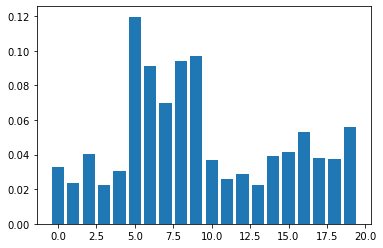

In [70]:
plt.bar(x, importance, width=0.8)

In [30]:
all_vars = ["HR1", "HR2", "HR3", "HR4", "HR5", "T1", "T2", "T3", "T4", "T5", "PB1", "PB2", 
            "PB3", "PB4", "PB5", "VV1", "VV2", "VV3", "VV4", "VV5"]

In [31]:
len(all_vars)

20